## TCT Day 8 - Pandas cont'

* hw4 walkthrough 
* Additional useful pandas and numpy functions
    - pasting data from clipboard
    - generating random numbers
    - creating simple line plots
    - fill forward and backwords
    - calculating rolling averages
    - calcalating cummulative values
    - one-hot coding using get_dummies
    - creating categorical values using cut
    - mapping using map
    - scaling data using min/max and zscore scalers

In [1]:
import pandas as pd

#### df from clipboard

In [2]:
df_from_clipboard=pd.read_clipboard()
df_from_clipboard

,date,Products_Ordered,Widgets_Ordered,Total_Ordered,Total_Ordered_Cum_
0,09-11-2021,0.0,0.0,0.0,0
1,10-11-2021,0.0,0.0,0.0,0
2,11-11-2021,0.0,2.0,2.0,2
3,12-11-2021,0.0,3.0,3.0,5
4,13-11-2021,0.0,0.0,0.0,5
...,...,...,...,...,...
413,27-12-2022,NaN,NaN,NaN,"1021,8128"
414,28-12-2022,NaN,NaN,NaN,"1024,8152"
415,29-12-2022,NaN,NaN,NaN,"1027,8176"
416,30-12-2022,NaN,NaN,NaN,"1030,82"


#### create dataframe

In [4]:
todays_date=pd.to_datetime('today')
todays_date

Timestamp('2022-06-01 19:04:06.390712')

In [5]:
date_range=pd.date_range('01-01-2022',todays_date)

In [6]:
df=pd.DataFrame(date_range)

In [7]:
df.head()

,0
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05


In [8]:
df.columns=['date'] #rename column 

In [9]:
df.head()

,date
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    152 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.3 KB


In [11]:
import numpy as np

In [12]:
random_numbers=np.random.randint(high=100,low=0,size=152) #generate random numbers 0 to 151

In [13]:
random_numbers

array([66, 80, 63, 83, 24, 84, 69, 14, 68, 77, 25,  6, 33, 63, 68, 51, 76,
       69, 63, 57, 56, 56,  6, 21, 60, 18, 66, 64, 39, 83, 70, 89, 98, 74,
       64, 75, 66, 31, 37,  0,  4, 23, 86, 82, 15, 30, 77, 36, 86, 64, 52,
        0, 18, 22, 66,  3, 51,  9, 95, 89, 38, 37, 15, 26, 33, 99, 93, 32,
       27, 80, 45, 35, 32, 59, 85, 34, 80, 76, 95, 84, 40, 61, 54, 52, 88,
       73, 60, 24,  9, 21, 66, 81, 72, 15, 76, 70, 36, 27, 37, 35, 90, 16,
       36, 58, 65, 76, 62, 50, 77, 77,  5, 95, 90, 47, 13, 81, 94, 59, 69,
        3, 57, 93, 77, 61, 77,  1, 63, 27, 74, 24, 37, 71, 47, 20, 61, 72,
       43, 96, 20, 93, 20, 61, 18, 26, 57, 10, 18, 94, 24,  4, 20, 19])

In [14]:
df['data']=random_numbers

In [15]:
df.head(2)

,date,data
0,2022-01-01,66
1,2022-01-02,80


<AxesSubplot:xlabel='date'>

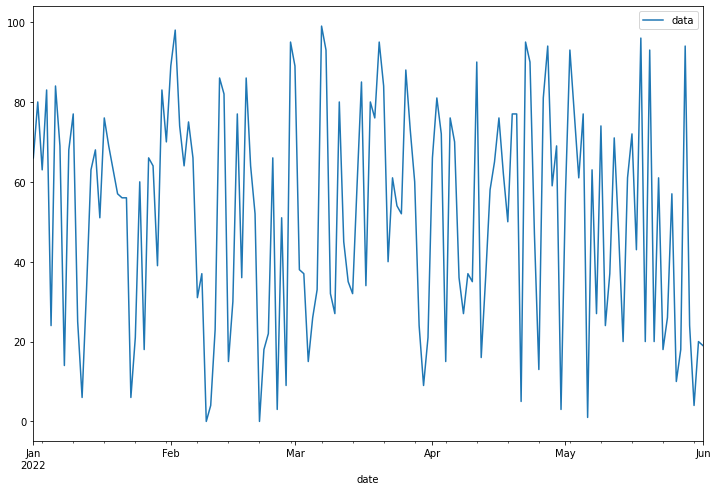

In [17]:
df.plot(x='date',y='data',kind='line',figsize=(12,8))

In [22]:
df['SMA_7']=df['data'].rolling(7).mean() # calcualte rolling average 7 days 

In [19]:
df.head(10)

,date,data,SMA_7
0,2022-01-01,66,NaN
1,2022-01-02,80,NaN
2,2022-01-03,63,NaN
3,2022-01-04,83,NaN
4,2022-01-05,24,NaN
5,2022-01-06,84,NaN
6,2022-01-07,69,67.000000
7,2022-01-08,14,59.571429
8,2022-01-09,68,57.857143
9,2022-01-10,77,59.857143


<AxesSubplot:xlabel='date'>

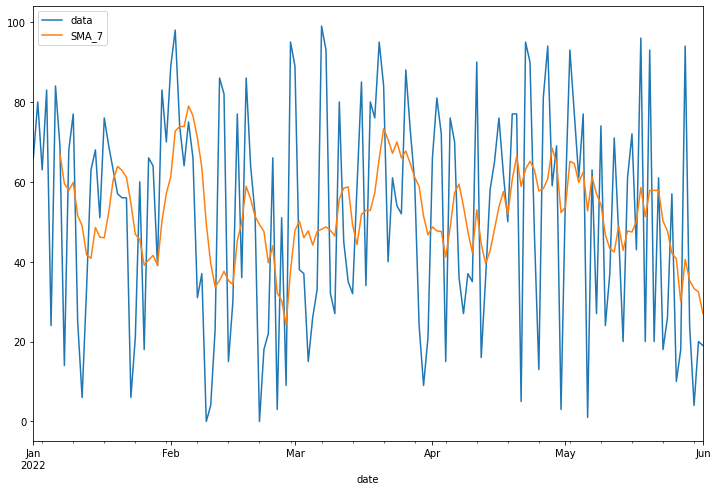

In [20]:
df.plot(x='date',y=['data','SMA_7'],kind='line',figsize=(12,8))

In [23]:
df['SMA_14']=df['data'].rolling(14).mean()

In [24]:
df['SMA_30']=df['data'].rolling(30).mean()

<AxesSubplot:xlabel='date'>

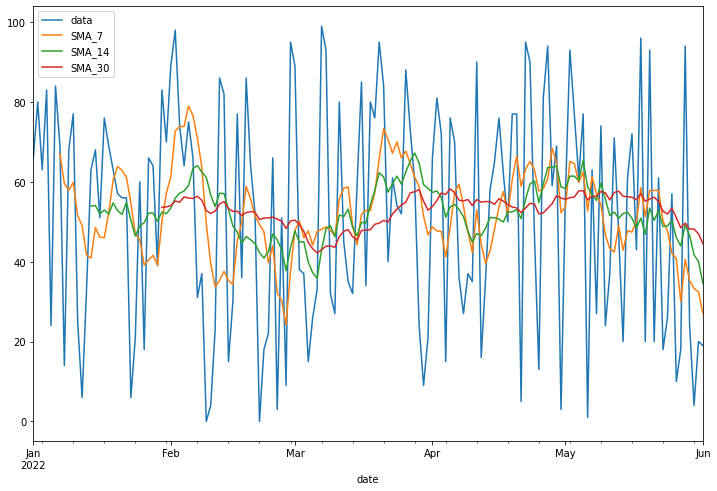

In [25]:
df.plot(x='date',y=['data','SMA_7','SMA_14','SMA_30'],kind='line',figsize=(12,8))

In [26]:
df['data_cum']=df['data'].cumsum() #calculate cummulative value 

In [28]:
df.head(10)

,date,data,SMA_7,SMA_14,SMA_30,data_cum
0,2022-01-01,66,NaN,NaN,NaN,66
1,2022-01-02,80,NaN,NaN,NaN,146
2,2022-01-03,63,NaN,NaN,NaN,209
3,2022-01-04,83,NaN,NaN,NaN,292
4,2022-01-05,24,NaN,NaN,NaN,316
5,2022-01-06,84,NaN,NaN,NaN,400
6,2022-01-07,69,67.000000,NaN,NaN,469
7,2022-01-08,14,59.571429,NaN,NaN,483
8,2022-01-09,68,57.857143,NaN,NaN,551
9,2022-01-10,77,59.857143,NaN,NaN,628


<AxesSubplot:xlabel='date'>

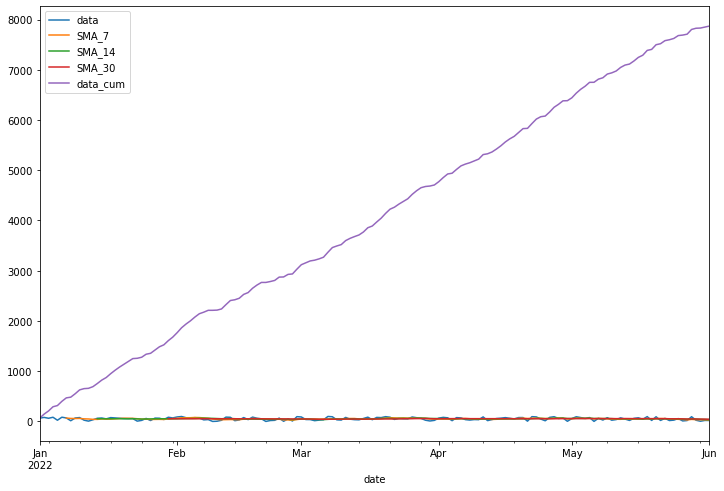

In [27]:
df.plot(x='date',y=['data','SMA_7','SMA_14','SMA_30','data_cum'],kind='line',figsize=(12,8))

**Exercise**: 
   - create a new column ´data_seq´ in the same df, where all the numbers are in sequence 0 to length of dataframe.
   - create another column with the cumulative sum and plot both column on the date access in the same line chart

In [29]:
data_seq=np.arange(0,df.shape[0]) #create sequenctial numbers 0 to 152 

In [33]:
df['data_seq']=data_seq

In [30]:
data_seq

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151])

In [31]:
len(data_seq)

152

In [32]:
len(df)

152

In [34]:
df.head()

,date,data,SMA_7,SMA_14,SMA_30,data_cum,data_seq
0,2022-01-01,66,NaN,NaN,NaN,66,0
1,2022-01-02,80,NaN,NaN,NaN,146,1
2,2022-01-03,63,NaN,NaN,NaN,209,2
3,2022-01-04,83,NaN,NaN,NaN,292,3
4,2022-01-05,24,NaN,NaN,NaN,316,4


In [35]:
df_fillna=df.copy()

In [36]:
df_fillna=df.fillna(0)
df_fillna.head()

,date,data,SMA_7,SMA_14,SMA_30,data_cum,data_seq
0,2022-01-01,66,0.0,0.0,0.0,66,0
1,2022-01-02,80,0.0,0.0,0.0,146,1
2,2022-01-03,63,0.0,0.0,0.0,209,2
3,2022-01-04,83,0.0,0.0,0.0,292,3
4,2022-01-05,24,0.0,0.0,0.0,316,4


In [40]:
df_ffill=df.iloc[:10]

In [41]:
df_ffill

,date,data,SMA_7,SMA_14,SMA_30,data_cum,data_seq
0,2022-01-01,66,NaN,NaN,NaN,66,0
1,2022-01-02,80,NaN,NaN,NaN,146,1
2,2022-01-03,63,NaN,NaN,NaN,209,2
3,2022-01-04,83,NaN,NaN,NaN,292,3
4,2022-01-05,24,NaN,NaN,NaN,316,4
5,2022-01-06,84,NaN,NaN,NaN,400,5
6,2022-01-07,69,67.000000,NaN,NaN,469,6
7,2022-01-08,14,59.571429,NaN,NaN,483,7
8,2022-01-09,68,57.857143,NaN,NaN,551,8
9,2022-01-10,77,59.857143,NaN,NaN,628,9


In [49]:
df_ffill.isnull().sum()

date         0
data         0
SMA_7        6
SMA_14      10
SMA_30      10
data_cum     0
data_seq     0
dtype: int64

In [48]:
df_ffill.isna().sum()

date         0
data         0
SMA_7        6
SMA_14      10
SMA_30      10
data_cum     0
data_seq     0
dtype: int64

In [44]:
df_ffill.fillna(axis=0,method='bfill')

,date,data,SMA_7,SMA_14,SMA_30,data_cum,data_seq
0,2022-01-01,66,67.000000,NaN,NaN,66,0
1,2022-01-02,80,67.000000,NaN,NaN,146,1
2,2022-01-03,63,67.000000,NaN,NaN,209,2
3,2022-01-04,83,67.000000,NaN,NaN,292,3
4,2022-01-05,24,67.000000,NaN,NaN,316,4
5,2022-01-06,84,67.000000,NaN,NaN,400,5
6,2022-01-07,69,67.000000,NaN,NaN,469,6
7,2022-01-08,14,59.571429,NaN,NaN,483,7
8,2022-01-09,68,57.857143,NaN,NaN,551,8
9,2022-01-10,77,59.857143,NaN,NaN,628,9


In [45]:
df_ffill.fillna(axis=1,method='bfill')

,date,data,SMA_7,SMA_14,SMA_30,data_cum,data_seq
0,2022-01-01,66,66,66,66,66,0
1,2022-01-02,80,146,146,146,146,1
2,2022-01-03,63,209,209,209,209,2
3,2022-01-04,83,292,292,292,292,3
4,2022-01-05,24,316,316,316,316,4
5,2022-01-06,84,400,400,400,400,5
6,2022-01-07,69,67.0,469,469,469,6
7,2022-01-08,14,59.571429,483,483,483,7
8,2022-01-09,68,57.857143,551,551,551,8
9,2022-01-10,77,59.857143,628,628,628,9


In [ ]:
df_ffill.fillna(axis=1,method='bfill')

In [51]:
gender_array=['female']*len(df) # generate an array with 152 values of female

In [52]:
gender_array

['female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',

In [53]:
df['gender']=gender_array

In [55]:
df.index[0]

0

In [56]:
df['gender']=np.where(df.index % 2 == 0, 'male', df['gender']) #replace value with male for even number of index and leave female for odd indexes

In [57]:
df.gender.value_counts()

male      76
female    76
Name: gender, dtype: int64

In [58]:
mapping={'male':'M','female':'F'}

In [59]:
df['gender_code']=df['gender'].map(mapping) #mapping values 

In [60]:
df.head()

,date,data,SMA_7,SMA_14,SMA_30,data_cum,data_seq,gender,gender_code
0,2022-01-01,66,NaN,NaN,NaN,66,0,male,M
1,2022-01-02,80,NaN,NaN,NaN,146,1,female,F
2,2022-01-03,63,NaN,NaN,NaN,209,2,male,M
3,2022-01-04,83,NaN,NaN,NaN,292,3,female,F
4,2022-01-05,24,NaN,NaN,NaN,316,4,male,M


#### One-hot coding

In [61]:
pd.get_dummies(df.gender_code)

,F,M
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
147,1,0
148,0,1
149,1,0
150,0,1


In [62]:
dummies=pd.get_dummies(df.gender_code)

In [63]:
df_dummies=pd.concat([df,dummies],axis=1)
df_dummies.head()

,date,data,SMA_7,SMA_14,SMA_30,data_cum,data_seq,gender,gender_code,F,M
0,2022-01-01,66,NaN,NaN,NaN,66,0,male,M,0,1
1,2022-01-02,80,NaN,NaN,NaN,146,1,female,F,1,0
2,2022-01-03,63,NaN,NaN,NaN,209,2,male,M,0,1
3,2022-01-04,83,NaN,NaN,NaN,292,3,female,F,1,0
4,2022-01-05,24,NaN,NaN,NaN,316,4,male,M,0,1


In [65]:
bins=[0,25,50,75,100]
labels=['0-25','26-50','51-75','>75']

In [66]:
df['data_cat']=pd.cut(df['data'],bins=bins,labels=labels)

In [68]:
df.head(20)

,date,data,SMA_7,SMA_14,SMA_30,data_cum,data_seq,gender,gender_code,data_cat
0,2022-01-01,66,NaN,NaN,NaN,66,0,male,M,51-75
1,2022-01-02,80,NaN,NaN,NaN,146,1,female,F,>75
2,2022-01-03,63,NaN,NaN,NaN,209,2,male,M,51-75
3,2022-01-04,83,NaN,NaN,NaN,292,3,female,F,>75
4,2022-01-05,24,NaN,NaN,NaN,316,4,male,M,0-25
5,2022-01-06,84,NaN,NaN,NaN,400,5,female,F,>75
6,2022-01-07,69,67.000000,NaN,NaN,469,6,male,M,51-75
7,2022-01-08,14,59.571429,NaN,NaN,483,7,female,F,0-25
8,2022-01-09,68,57.857143,NaN,NaN,551,8,male,M,51-75
9,2022-01-10,77,59.857143,NaN,NaN,628,9,female,F,>75


In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler=MinMaxScaler()

In [75]:
array=np.array(df['data'])

In [79]:
df[['data','data_cum']]=scaler.fit_transform(df[['data','data_cum']])

In [80]:
df.head()

,date,data,SMA_7,SMA_14,SMA_30,data_cum,data_seq,gender,gender_code,data_cat
0,2022-01-01,0.666667,NaN,NaN,NaN,0.000000,0,male,M,51-75
1,2022-01-02,0.808081,NaN,NaN,NaN,0.010251,1,female,F,>75
2,2022-01-03,0.636364,NaN,NaN,NaN,0.018324,2,male,M,51-75
3,2022-01-04,0.838384,NaN,NaN,NaN,0.028960,3,female,F,>75
4,2022-01-05,0.242424,NaN,NaN,NaN,0.032035,4,male,M,0-25


In [82]:
from scipy.stats import zscore

In [84]:
zscore_test=df['data'].copy()

In [88]:
zscore_test=pd.DataFrame(zscore_test)

In [89]:
zscale_data=zscore_test.apply(zscore)

In [90]:
zscale_data

,data
0,0.511350
1,1.014659
2,0.403498
3,1.122511
4,-0.998576
...,...
147,1.517967
148,-0.998576
149,-1.717588
150,-1.142378


In [91]:
df[['data_seq_scaled']]=scaler.fit_transform(df[['data_seq']])

In [93]:
df.head()

,date,data,SMA_7,SMA_14,SMA_30,data_cum,data_seq,gender,gender_code,data_cat,data_seq_scaled
0,2022-01-01,0.666667,NaN,NaN,NaN,0.000000,0,male,M,51-75,0.000000
1,2022-01-02,0.808081,NaN,NaN,NaN,0.010251,1,female,F,>75,0.006623
2,2022-01-03,0.636364,NaN,NaN,NaN,0.018324,2,male,M,51-75,0.013245
3,2022-01-04,0.838384,NaN,NaN,NaN,0.028960,3,female,F,>75,0.019868
4,2022-01-05,0.242424,NaN,NaN,NaN,0.032035,4,male,M,0-25,0.026490


In [95]:
df['data_seq'].describe()

count    152.000000
mean      75.500000
std       44.022721
min        0.000000
25%       37.750000
50%       75.500000
75%      113.250000
max      151.000000
Name: data_seq, dtype: float64

In [96]:
df['data_seq_scaled'].describe()

count    152.000000
mean       0.500000
std        0.291541
min        0.000000
25%        0.250000
50%        0.500000
75%        0.750000
max        1.000000
Name: data_seq_scaled, dtype: float64